In [1]:
#copied from traffic_demo.py
%matplotlib inline


In [1]:
#pid,tz = 23618402, 'Europe/Berlin'

pid,tz = 23602975, 'Europe/Amsterdam'

#pid,tz = 20095971,'America/Chicago'
#pid,tz = 20095972,'America/Chicago'

In [2]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 5]


In [3]:
import os,sys
from hmctools.segment import TopologySegment,HmcPartition
import pytz,datetime

import numpy as np
import pandas as pd

In [4]:
def get_traffic_speeds(pid,sid,orient,offset ,tzstring):

    segment = TopologySegment(pid,sid)

    live_traffic_data = segment.get_live_traffic_speed(offset,orient)
    if live_traffic_data is None:
        return None,None
    live_speed = live_traffic_data[2]
    live_time = live_traffic_data[0]
    if live_traffic_data[1]!=0:
        print('Careful - there is a nonzero value for update time!',live_traffic_data[1])

    #need to convert UTC timestamp to local datetime
    live_utc = datetime.datetime.fromtimestamp(live_time, pytz.timezone('UTC') )
    local_tz = pytz.timezone(tzstring) # e.g. 'Europe/Berlin'
    local_time = live_utc.astimezone(local_tz)

    print("Local time ",local_time)
    pattern_speed = segment.get_historical_traffic_speed(offset,orient, local_time )
    print("Historical/live speed:",pattern_speed,live_speed)

    return pattern_speed,live_speed


In [5]:
def main(pid,tzstring):

    historical_speeds = []
    live_speeds = []
    segids = []
    dots = []
    seglens= []
    segfcs = []
    #just use offset=0.5 of each segment
    offset = 0.5

    partition = HmcPartition(pid)
    all_segment_ids = partition.get_all_segment_ids()
     
    nexcept = 0
    nok = 0
        
    for iseg,seg in enumerate(all_segment_ids):
        segment = TopologySegment(pid,seg)
        aa = segment.accessible_by(offset)
        dot = segment.travel_direction(offset)
        if not aa:
            continue
        if dot=='BOTH':
            dot = ['FORWARD','BACKWARD']
        else:
            dot = [dot]
        segment_length = segment.length()
        fcstring = segment.functional_class(offset)
        if fcstring is not None:
            fc = int( fcstring[-1] )
        else:
            fc =0
        for dd in dot:

            try:
                hist,live = get_traffic_speeds( pid,seg,dd,offset,tzstring )
                historical_speeds.append(hist)
                live_speeds.append(live)
                segids.append(seg)
                dots.append(dd)
                seglens.append(segment_length)
                segfcs.append(fc)
                
                nok += 1
            except:
                nexcept +=1
                #print('warning: exception caught')
        #if iseg>10:
        #    break
    return pd.DataFrame( {'segment':segids,'direction':dots,'historical':historical_speeds,'live':live_speeds,'FC':segfcs,'length':seglens}  )



In [6]:

df = main(pid, tz)
print(df)

Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 19 22.21
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 41 30.04
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 22.62
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 32 29.79
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 27.21
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 42 42.65
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 36 26.4
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 36.39
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 25 41.77
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 42 38.49
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 33 25.95
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 26.51
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 44 36.5
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 13 22.21
Local time  20

Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 28.38
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 33 30.69
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 39.75
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 41 38.04
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 36 31.62
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 35 22.0
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 23 29.43
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 17 13.35
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 17.55
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 15 16.53
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 38 56.87
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 47.18
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 36 23.65
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 43 29.43
Local time  2

Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 50 28.38
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 33 40.19
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 41.89
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 21 26.22
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 36.36
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 50 36.5
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 39 42.84
WARNING in get_live_traffic_speed; there are too many matches (will just use the first one) 3 23602975 87663916 FORWARD 0.5 ['E3817N55432', 'E3817P55561', 'E3817P55297']
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 37 24.47
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 36.02
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 40 38.49
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 35 25.78
Local time  2020-06-12 07:52:47+02:00
Historical/live s

Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 43 36.02
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 38.49
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 34 36.36
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 29 36.51
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 27 25.78
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 15 28.9
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 24 20.62
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 12 22.86
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 27 25.21
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 18 17.52
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 45 24.67
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 31 28.73
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 38 29.11
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 31 37.89
Local time  2020-06

Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 17 31.15
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 24.35
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 28 22.0
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 34 29.53
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 28.69
WARNING in get_live_traffic_speed; there are too many matches (will just use the first one) 2 23602975 97147294 BACKWARD 0.5 ['E3817N55276', 'E3817N55281']
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 36 43.95
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 23 22.21
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 25 19.87
WARNING in get_live_traffic_speed; there are too many matches (will just use the first one) 2 23602975 97253645 FORWARD 0.5 ['E3817N55338', 'E3817N55237']
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 19 29.78
Local time  2020-06-12 07:52:47+02:00
Historical/live sp

Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 37 31.62
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 23 36.5
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 28 36.5
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 33 30.69
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 30 37.3
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 38 38.78
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 31 36.5
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 26 31.73
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 30.62
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 30.77
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 17 29.48
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 23 30.69
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 26 37.04
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 34 27.85
Local time  2020-06-

Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 28 31.15
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 29.43
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 39 36.36
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 27 28.73
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 49 42.89
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 40 39.75
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 38.04
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 27 27.01
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 26.51
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 28.38
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 23 30.69
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 37 36.51
WARNING in get_live_traffic_speed; there are too many matches (will just use the first one) 2 23602975 105232809 FORWARD 0.5 ['E3817P55338', 'E3817N5523

Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 17 13.44
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 20.23
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 35.51
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 46 30.39
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 38.04
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 25 39.75
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 36 25.7
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 29 38.04
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 39.75
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 47 39.89
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 42 31.72
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 39 25.21
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 25.32
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 34 15.25
Local time 

Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 41 39.74
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 37.89
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 28 25.32
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 32 29.38
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 25.95
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 25 37.3
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 32 26.26
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 38 45.36
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 26.51
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 40 27.01
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 23 22.8
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 32 29.53
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 39 31.7
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 25.83
Local time  202

Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 32 22.62
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 19 16.27
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 41 36.5
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 78 78.81
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 40 37.62
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 32 22.98
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 22.21
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 28 26.22
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 41 29.45
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 26 36.5
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 42 37.62
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 42 42.0
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 36 37.3
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 45 29.45
Local time  2020-06-12

Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 33 25.83
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 46 36.2
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 37 42.0
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 27 17.38
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 30.77
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 40 29.48
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 49 42.0
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 37.75
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 32 35.6
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 34 15.94
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 41 39.24
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 31.78
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 29 25.21
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 33 31.73
WARNING in get_liv

Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 38 30.62
WARNING in get_live_traffic_speed; there are too many matches (will just use the first one) 2 23602975 201648469 FORWARD 0.5 ['E3817P38012', 'E3817P55275']
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 100 101.69
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 30.04
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 32 22.62
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 16 30.39
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 41 30.69
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 22 25.62
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 48 41.77
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 33 29.38
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 25.95
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 30 24.66
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 33 36.3

Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 29 22.98
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 19 22.98
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 19 22.77
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 39.75
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 43 38.04
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 43.95
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 45 31.69
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 28 22.77
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 36 20.64
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 16 30.77
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 29.48
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 32 19.84
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 19 23.09
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 91 105.95
Local time  2

Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 25 17.38
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 29 17.79
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 23 20.23
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 29 19.84
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 33 19.84
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 28 19.84
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 25 24.54
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 36 22.86
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 27 25.22
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 32 19.84
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 27 24.54
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 38 19.84
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 26 19.84
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 18 19.84
Local time  2020-06-

Historical/live speed: 21 13.35
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: None 17.55
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 29 26.22
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 20 26.22
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 30 26.22
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 24 26.22
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 19 35.79
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 30 26.22
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 26 26.22
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 29 26.22
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 29 26.22
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 43 38.49
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 41 38.49
Local time  2020-06-12 07:52:47+02:00
Historical/live speed: 34 21.58
Local time  2020-06-12 07:52:47+02:00
Historical/live sp

In [7]:
df.dropna(subset=['historical','live','FC','length'],inplace=True)

df['residual']=df['live']-df['historical']
df['km']=df['length']/1000.0
df['weighted_residual'] = df['residual']*df['km']
print( df['FC'].unique() )
maxval = max( df['residual'].max(), abs(df['residual'].min())  )
colmap = {1:'k',2:'r',3:'g',4:'b',5:'m'}
binning = np.linspace(-maxval,maxval,26)


[3 2 4 5 1]


FC1: length-weighted mean = 5.338001294782122
FC2: length-weighted mean = -1.4220467580536467
FC3: length-weighted mean = -4.8883026733575585
FC4: length-weighted mean = -4.154687863320722


Text(0, 0.5, 'Total km')

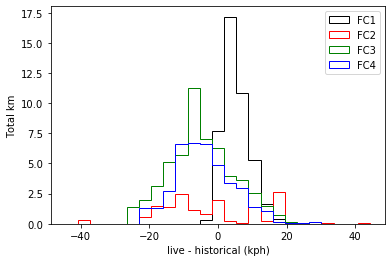

In [8]:
groups = df.groupby('FC')
for ifc, gdata in groups:
    if ifc==5:
        continue
    plt.hist( gdata['residual'],bins=binning,color=colmap[ifc],histtype='step',label='FC'+str(ifc),weights=gdata['km'])
    #ax[1].hist( gdata['residual'],bins=binning,color=colmap[ifc],histtype='step',label='FC'+str(ifc),normed=True)
    print("FC"+str(ifc)+': length-weighted mean = '+str( gdata['weighted_residual'].sum() /gdata['km'].sum() ))

#for i in range(2):
plt.legend()
plt.xlabel('live - historical (kph)')
plt.ylabel('Total km')


In [9]:
df.head()

,segment,direction,historical,live,FC,length,residual,km,weighted_residual
4,76333167,BACKWARD,19.0,22.21,3,24.51817,3.21,0.024518,0.078703
46,76689661,FORWARD,41.0,30.04,2,29.05034,-10.96,0.029050,-0.318392
65,76780856,FORWARD,32.0,29.79,4,39.12890,-2.21,0.039129,-0.086475
87,76951990,FORWARD,42.0,42.65,4,27.27011,0.65,0.027270,0.017726
112,77091139,BACKWARD,36.0,26.40,4,34.50149,-9.60,0.034501,-0.331214


In [10]:
from nagini.utils.tiling import bounding_box_from_tile_id
clat = bounding_box_from_tile_id(pid).center().latitude
clon = bounding_box_from_tile_id(pid).center().longitude

In [11]:
cmap_name = 'RdYlGn'#'seismic'
cm = matplotlib.cm.get_cmap(cmap_name)
max_abs_res = max( np.abs( df['residual'] ))


In [12]:
def get_color(val,max_abs_residual):
    norm = matplotlib.colors.Normalize(vmin=-max_abs_residual, vmax=max_abs_residual)
    ctuple = cm(norm(val),bytes=True)
    cstr = '#'
    for i in range(3):
        cstr+= hex(ctuple[i])[2:].zfill(2)
    return cstr
print(max_abs_res)

44.39


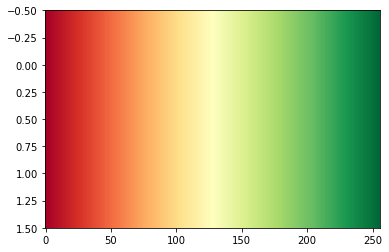

In [13]:
norm=matplotlib.colors.Normalize(vmin=-max_abs_res, vmax=max_abs_res)
gradient = np.linspace(-max_abs_res, max_abs_res, 256)
gradient = np.vstack((gradient, gradient))
plt.imshow(norm(gradient), aspect='auto', cmap=cm)

In [14]:
import nagini
from ipyleaflet import Map, Polyline
hls = nagini.resource('hls')

mymap = hls.map(center=[clat, clon], zoom=12)

for idx,row in df.iterrows():
    sid = row['segment']
    geom = [ list(q) for q in TopologySegment(pid,sid).shape_points() ]
    #print(sid,geom)
    c = get_color(row['residual'],max_abs_res)
    pl = Polyline(locations = geom,color=c,fill=False)
    mymap.add_layer(pl)


In [15]:
from ipyleaflet import FullScreenControl
mymap.add_control(FullScreenControl())
mymap

LeafletMap(basemap={'url': 'https://2.base.maps.api.here.com/maptile/2.1/maptile/newest/normal.day/{z}/{x}/{y}…